In [327]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

#Deeplearning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [328]:
#Import Data
df=pd.read_excel('Data_Train.xlsx')

In [329]:
#Check head
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [330]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [331]:
#Check null values
df.isna().sum()/df.count()*100

TITLE             0.000000
RESTAURANT_ID     0.000000
CUISINES          0.000000
TIME              0.000000
CITY              0.890444
LOCALITY          0.778272
RATING            0.015763
VOTES            10.482326
COST              0.000000
dtype: float64

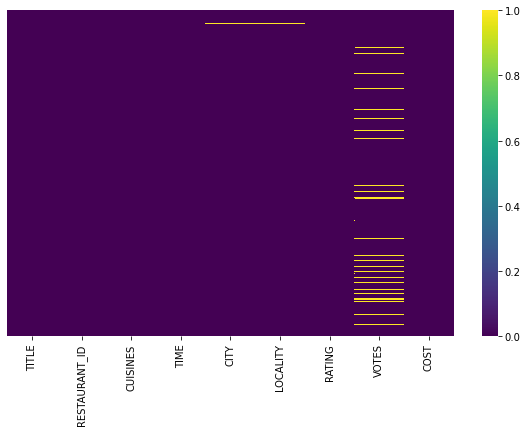

In [332]:
#Check null values with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),yticklabels=False,cmap='viridis')
plt.show()

In [333]:
#Check stats
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [334]:
#There are 359 unique values
df['CITY'].value_counts()

Chennai                          2174
Bangalore                        2149
Hyderabad                        1819
Mumbai                           1722
New Delhi                        1321
                                 ... 
ward X11                            1
Vasai West.                         1
BTM 1st Stage                       1
Perambur                            1
Chennai. (Near Hotel Matshya)       1
Name: CITY, Length: 359, dtype: int64

In [335]:
sum(df['CITY'].value_counts()<10)

336

In [336]:
df['LOCALITY'].value_counts()

Gachibowli                         166
Indiranagar                        138
Edappally                          122
Kakkanad                           121
HSR                                120
                                  ... 
Kormangala 5th Block                 1
Indirapuram Habitat Centre           1
Old Bowenpally                       1
Mootaikaranchavadi Thuraipakkam      1
The Mylapore Cafe 29                 1
Name: LOCALITY, Length: 1416, dtype: int64

In [337]:
sum(df['LOCALITY'].value_counts()<10)

1066

In [338]:
df['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [339]:
df['VOTES'].value_counts()

44 votes      71
28 votes      66
29 votes      66
38 votes      65
35 votes      64
              ..
2252 votes     1
1026 votes     1
2023 votes     1
4403 votes     1
1745 votes     1
Name: VOTES, Length: 1847, dtype: int64

In [340]:
def imput_vot(x):
    if pd.isnull(x)==True:
        return x
    else:
        return int(x[:x.find('v')].strip())

In [341]:
df['VOTES']=df.apply(lambda x : imput_vot(x['VOTES']),axis=1)

In [342]:
df['VOTES'].mean()

415.66890127111265

In [343]:
df['VOTES'].std()

842.722909350643

In [344]:
si=SimpleImputer(strategy='mean')

In [345]:
df['VOTES']=si.fit_transform(df['VOTES'].values.reshape(-1,1))

In [346]:
df.isna().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             2
VOTES              0
COST               0
dtype: int64

In [347]:
df=df.dropna()

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12575 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12575 non-null  object 
 1   RESTAURANT_ID  12575 non-null  int64  
 2   CUISINES       12575 non-null  object 
 3   TIME           12575 non-null  object 
 4   CITY           12575 non-null  object 
 5   LOCALITY       12575 non-null  object 
 6   RATING         12575 non-null  object 
 7   VOTES          12575 non-null  float64
 8   COST           12575 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 982.4+ KB


In [349]:
df['TITLE'].value_counts()

QUICK BITES             4209
CASUAL DINING           3642
None                     923
CAFÉ                     603
DESSERT PARLOR           381
                        ... 
DESSERT PARLOR,KIOSK       1
MICROBREWERY,LOUNGE        1
BAR,MICROBREWERY           1
CAFÉ,FINE DINING           1
LOUNGE,CAFÉ                1
Name: TITLE, Length: 113, dtype: int64

In [350]:
for x in df['TITLE'].value_counts().index.tolist():
    if df[df['TITLE']==x].count()['TITLE']<10:
        df=df[df['TITLE']!=x]

In [351]:
df['TITLE'].value_counts().count()

50

In [352]:
le=LabelEncoder()
df['TITLE']=le.fit_transform(df['TITLE'])

In [353]:
df=df.drop('RESTAURANT_ID',axis=1)

In [354]:
df['CUISINES'].value_counts()

South Indian                                          529
North Indian                                          515
North Indian, Chinese                                 497
Fast Food                                             284
Chinese                                               166
                                                     ... 
Beverages, South Indian                                 1
Thai, Vietnamese, Asian, Chinese                        1
Hyderabadi, North Indian, Chinese                       1
Arabian, Indian                                         1
South Indian, Arabian, Biryani, Chettinad, Chinese      1
Name: CUISINES, Length: 4035, dtype: int64

In [355]:
def imput_cus(x):
    fnd=x.count(',')
    return int(fnd+1)

In [356]:
df['CUISINES']=df.apply(lambda x : imput_cus(x['CUISINES']),axis=1)

In [357]:
df=df.drop('TIME',axis=1)

In [358]:
for x in df['CITY'].value_counts().index.tolist():
    if df[df['CITY']==x].count()['CITY']<10:
        df=df[df['CITY']!=x]

In [359]:
for x in df['LOCALITY'].value_counts().index.tolist():
    if df[df['LOCALITY']==x].count()['LOCALITY']<10:
        df=df[df['LOCALITY']!=x]

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     9940 non-null   int64  
 1   CUISINES  9940 non-null   int64  
 2   CITY      9940 non-null   object 
 3   LOCALITY  9940 non-null   object 
 4   RATING    9940 non-null   object 
 5   VOTES     9940 non-null   float64
 6   COST      9940 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 621.2+ KB


In [361]:
df=df[df['RATING']!='NEW']

In [362]:
df['RATING'].unique()

array(['3.6', '4.2', '4.1', '3.8', '4.0', '3.9', '3.3', '3.4', '-', '4.3',
       '4.4', '2.7', '3.7', '4.7', '3.5', '3.1', '2.5', '4.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [363]:
df=df[df['RATING']!='-']

In [364]:
df['RATING']=df['RATING'].apply(lambda x : float(x))

In [365]:
df.select_dtypes('object').columns

Index(['CITY', 'LOCALITY'], dtype='object')

In [366]:
df['CITY'].nunique()

20

In [367]:
df['CITY']=le.fit_transform(df['CITY'])

In [368]:
df['LOCALITY']=le.fit_transform(df['LOCALITY'])

In [369]:
df.shape

(9017, 7)

In [370]:
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [371]:
df.shape

(8550, 7)

In [372]:
df.skew()

TITLE      -0.041534
CUISINES    0.632621
CITY        0.030731
LOCALITY    0.160456
RATING     -0.415987
VOTES       2.516942
COST        1.750969
dtype: float64

In [373]:
pt=PowerTransformer()

In [374]:
for x in df.columns.drop('COST'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [375]:
df.skew()

TITLE      -0.041534
CUISINES   -0.001102
CITY        0.030731
LOCALITY    0.160456
RATING     -0.415987
VOTES      -0.010466
COST        1.750969
dtype: float64

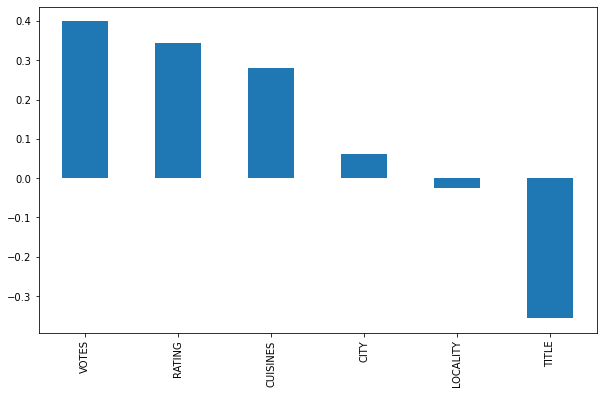

In [376]:
plt.figure(figsize=(10,6))
df.corr()['COST'].sort_values(ascending=False).drop('COST').plot(kind='bar')
plt.show()

In [377]:
# scale=MinMaxScaler()

In [378]:
scale=StandardScaler()

In [379]:
X=df.drop('COST',axis=1)
y=df['COST']

In [380]:
X=scale.fit_transform(X)

In [381]:
def model_sel(mod):
    maxscore=0
    maxstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        model=mod()
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxstate=x
    print("Max Score is {} at max state {}".format(maxscore,maxstate))

In [382]:
model_sel(LinearRegression)

Max Score is 0.29868341074460436 at max state 56


In [383]:
model_sel(Lasso)

Max Score is 0.2984771246837731 at max state 56


In [384]:
model_sel(Ridge)

Max Score is 0.2986790260573656 at max state 56


In [385]:
model_sel(ElasticNet)

Max Score is 0.2768691392813677 at max state 66


In [386]:
model_sel(KNeighborsRegressor)

Max Score is 0.342763474853934 at max state 66


In [387]:
model_sel(DecisionTreeRegressor)

Max Score is 0.4369753138772837 at max state 53


In [388]:
model_sel(RandomForestRegressor)

Max Score is 0.6777439073290961 at max state 88


In [389]:
model_sel(SVR)

Max Score is 0.1643995988596858 at max state 62


In [390]:
model_sel(AdaBoostRegressor)

Max Score is 0.426067578996816 at max state 56


In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=88)

In [392]:
param={'n_estimators':[100,130,150,170,190,210,230,250,270,290,310,330,350,370,390,410]}
gscv=GridSearchCV(RandomForestRegressor(),param)

In [393]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 130, 150, 170, 190, 210, 230,
                                          250, 270, 290, 310, 330, 350, 370,
                                          390, 410]})

In [394]:
gscv.best_params_

{'n_estimators': 350}

In [395]:
rf=RandomForestRegressor(n_estimators=350)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [396]:
r2_score(y_test,predict)

0.677538904778515

In [398]:
mean_absolute_error(y_test,predict)

177.19080692517971

In [399]:
mean_squared_error(y_test,predict)

64776.86160099509

In [400]:
#Save model
joblib.dump(rf,'Restaurant Cost RF.obj')

['Restaurant Cost RF.obj']